In [ ]:
✅ Step 1: Import Libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [ ]:
✅ Step 2: Load and Explore the Dataset


In [23]:
# Load dataset
df = pd.read_csv(r"C:\Users\Tanya Singh\Desktop\code_soft\task4\spam.csv", encoding='latin-1')[['v1', 'v2']]

df.columns = ['label', 'message']
df.head()

# Label encode (ham → 0, spam → 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:
✅ Step 3: Visualize Distribution

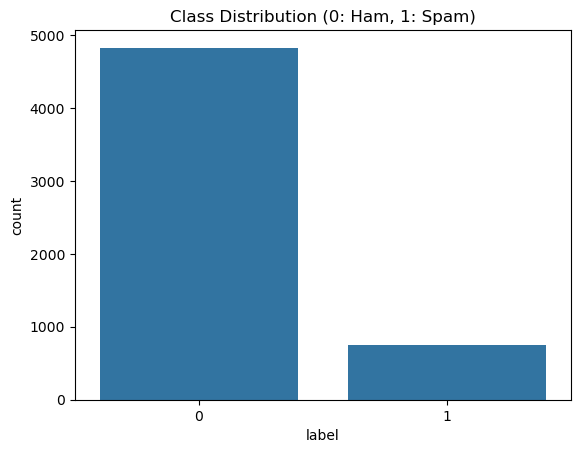

In [25]:
sns.countplot(x='label', data=df)
plt.title("Class Distribution (0: Ham, 1: Spam)")
plt.show()


In [ ]:
✅ Step 4: Data Preprocessing & Vectorization (TF-IDF)

In [27]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
✅ Step 5: Train and Evaluate Classifiers

In [29]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_pred = nb.predict(X_test_tfidf)

print("Naive Bayes:\n", classification_report(y_test, nb_pred))


Naive Bayes:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [33]:
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
lr_pred = lr.predict(X_test_tfidf)

print("Logistic Regression:\n", classification_report(y_test, lr_pred))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [35]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
svm_pred = svm.predict(X_test_tfidf)

print("SVM:\n", classification_report(y_test, svm_pred))


SVM:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
✅ Step 6: Confusion Matrix Visualization (Op

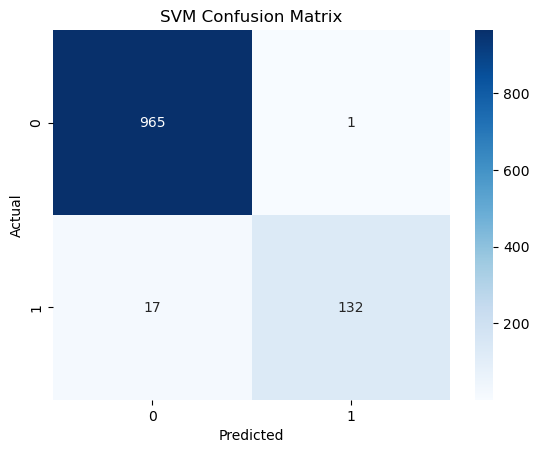

In [37]:
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
